In [4]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt 
import trimesh

# import the offscreen API
from open3d.visualization import rendering

In [5]:
import numpy as np
import open3d as o3d

# 1) Define the 8 cube corners, centered at (0,0,0)
#    Side length = 1 → coordinates in {−0.5, +0.5}
verts = np.array([
    [-0.5, -0.5, -0.5],
    [ 0.5, -0.5, -0.5],
    [ 0.5,  0.5, -0.5],
    [-0.5,  0.5, -0.5],
    [-0.5, -0.5,  0.5],
    [ 0.5, -0.5,  0.5],
    [ 0.5,  0.5,  0.5],
    [-0.5,  0.5,  0.5],
])

# 2) Define the 12 edges by index pairs
edges = np.array([
    [0, 1], [1, 2], [2, 3], [3, 0],  # bottom square
    [4, 5], [5, 6], [6, 7], [7, 4],  # top    square
    [0, 4], [1, 5], [2, 6], [3, 7],  # vertical pillars
])

# 3) Build an Open3D LineSet
cube_frame = o3d.geometry.LineSet(
    points=o3d.utility.Vector3dVector(verts),
    lines=o3d.utility.Vector2iVector(edges)
)

# 4) (Optional) color the edges
cube_frame.colors = o3d.utility.Vector3dVector([[0,0,0] for _ in range(len(edges))])

In [ ]:
def _offscreen_snapshot(geometries, width=800, height=600, 
                        center=(0,0,0), eye=(1,1,1), up=(0,0,1)):
    """Helper: render geometries to an image and return as numpy array."""
    r = rendering.OffscreenRenderer(width, height)
    scene = r.scene
    mat = rendering.MaterialRecord()
    for geo in geometries:
        scene.add_geometry("", geo, mat)
    r.setup_camera(60.0, np.array(center), np.array(eye), np.array(up))
    img = np.asarray(r.render_to_image())
    return img


[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x3aba2910 (threading is enabled)
EGL(1.5)
OpenGL(4.5)
[entity=441, primitive @ 0] missing required attributes (0xd), declared=0x5


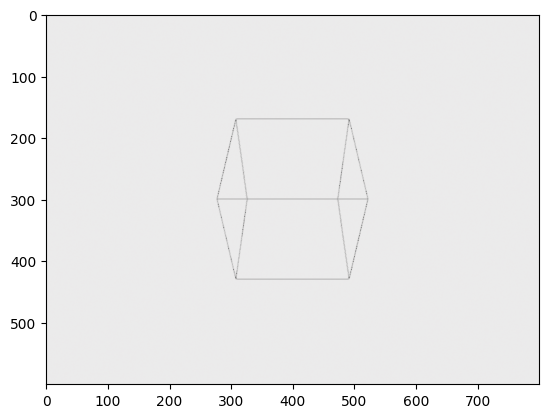

In [25]:
plt.imshow(_offscreen_snapshot([cube_frame], eye=(0, 2, -2)))